In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from CosinorPy import file_parser, cosinor, cosinor1

In [8]:
data = pd.read_csv("PrometneNesreče.csv")

C:\Users\Hana\AppData\Local\Temp\ipykernel_14476\4115990109.py:1: DtypeWarning: Columns (31,32,33,34,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("PrometneNesreče.csv")


In [37]:
# Število prometnih nesreč po urah
# Pretvori stolpec 'NastanekDatumCas' v pravilen format (vsaka vrednost bo pandas objekt za datum in čas)
data['NastanekDatumCas'] = pd.to_datetime(data['NastanekDatumCas'], format='ISO8601', errors='coerce')

# Za vsak vnos pridobi znotraj, katere ure se je zgodil
hours = data['NastanekDatumCas'].dt.hour

accidents_per_hour = hours.value_counts()

# Uredi podatke po vrstnem redu ur (naraščajoče)
accidents_per_hour = accidents_per_hour.sort_index()

# Ustvari pandas dataframe v formatu, ki bo primeren za uporabo CosinorPy
df_plot = pd.DataFrame({
    "test": "HourlyAccidents",  # konstantna oznaka vseh vrstic
    "x": accidents_per_hour.index,  # Ura (od 0 do 23)
    "y": accidents_per_hour.values  # Število nesreč za tisto uro
})

#print(df_plot)

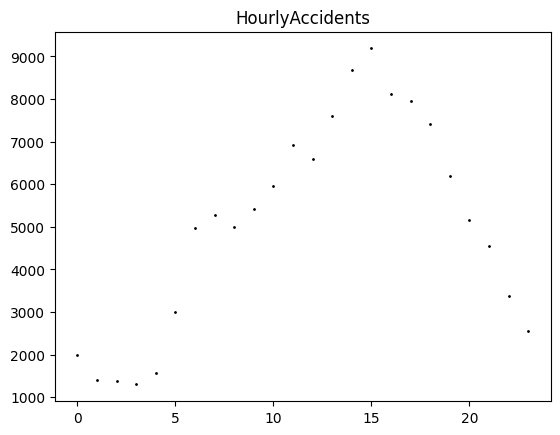

In [38]:
cosinor.plot_data(df_plot, names = ["HourlyAccidents"])

## Periodogram

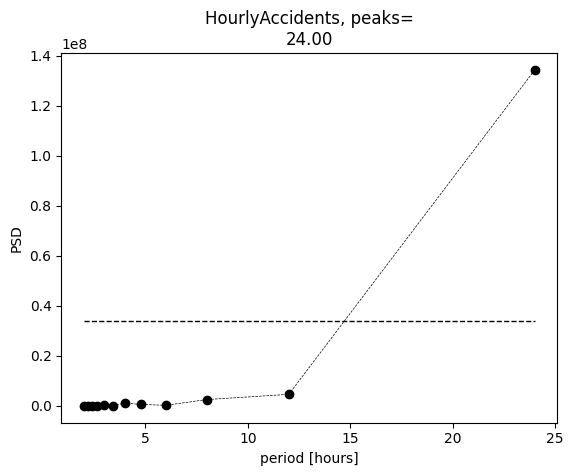

In [40]:
cosinor.periodogram_df(df_plot)

## Iskanje najboljšega modela

c:\Users\Hana\AppData\Local\Programs\Python\Python312\Lib\site-packages\CosinorPy\cosinor.py:1658: RuntimeWarning: invalid value encountered in scalar divide
  F = (SSLOF/(n_T-1-2*n_components))/(SSPE/(N-n_T))


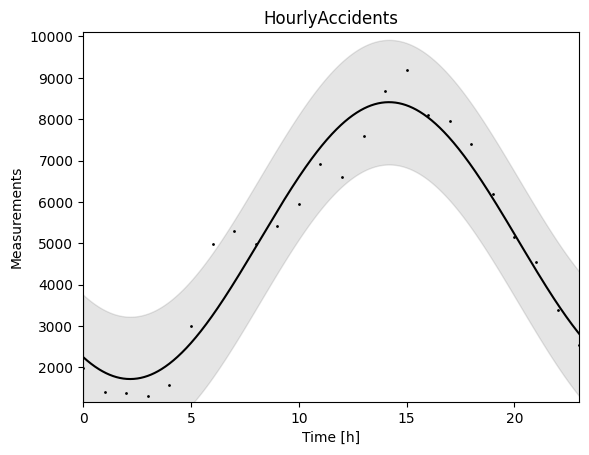

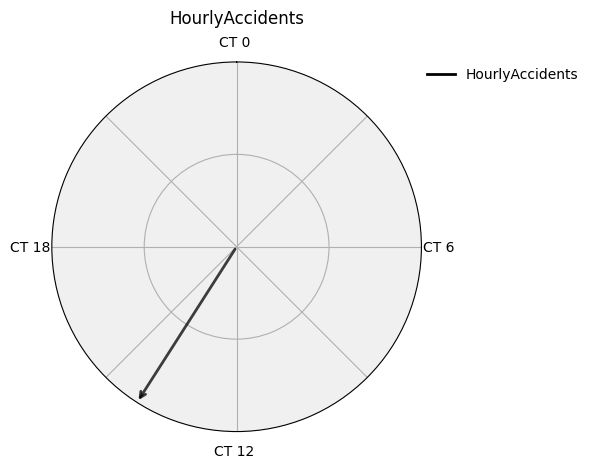

c:\Users\Hana\AppData\Local\Programs\Python\Python312\Lib\site-packages\CosinorPy\cosinor.py:1658: RuntimeWarning: invalid value encountered in scalar divide
  F = (SSLOF/(n_T-1-2*n_components))/(SSPE/(N-n_T))


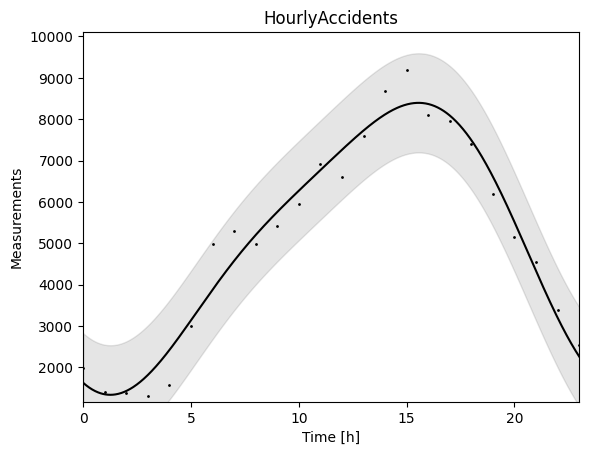

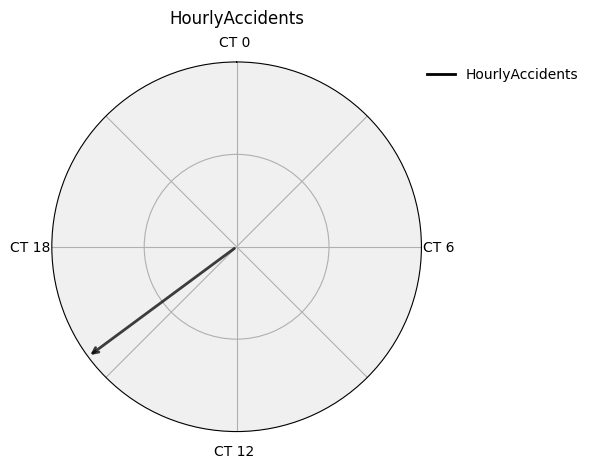

c:\Users\Hana\AppData\Local\Programs\Python\Python312\Lib\site-packages\CosinorPy\cosinor.py:1658: RuntimeWarning: invalid value encountered in scalar divide
  F = (SSLOF/(n_T-1-2*n_components))/(SSPE/(N-n_T))


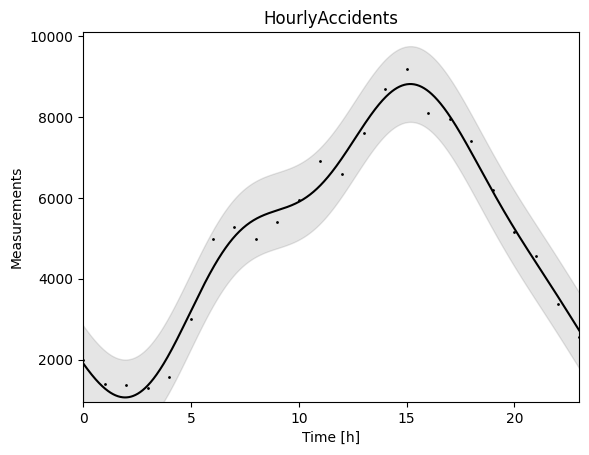

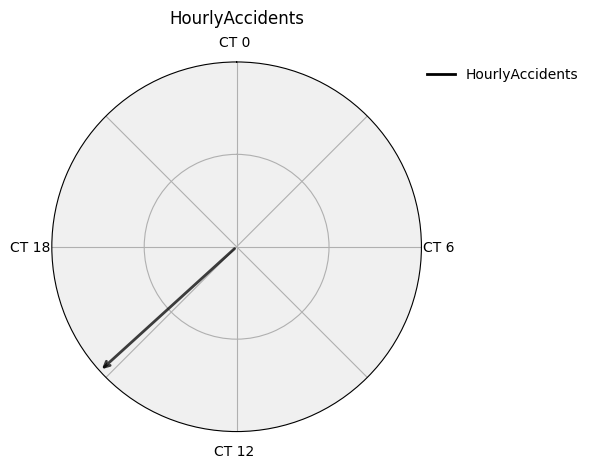

c:\Users\Hana\AppData\Local\Programs\Python\Python312\Lib\site-packages\CosinorPy\cosinor.py:1658: RuntimeWarning: invalid value encountered in scalar divide
  F = (SSLOF/(n_T-1-2*n_components))/(SSPE/(N-n_T))


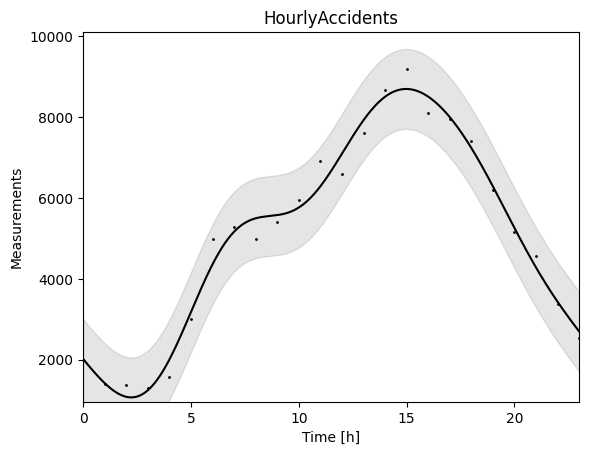

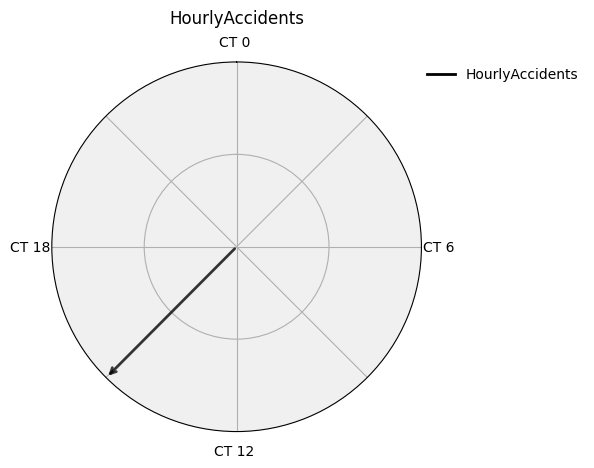

c:\Users\Hana\AppData\Local\Programs\Python\Python312\Lib\site-packages\CosinorPy\cosinor.py:1658: RuntimeWarning: invalid value encountered in scalar divide
  F = (SSLOF/(n_T-1-2*n_components))/(SSPE/(N-n_T))


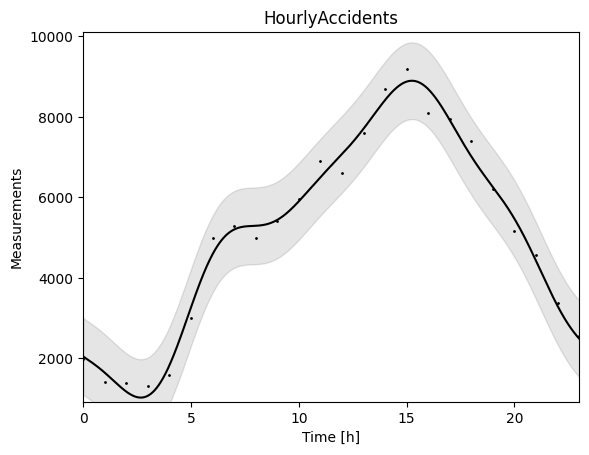

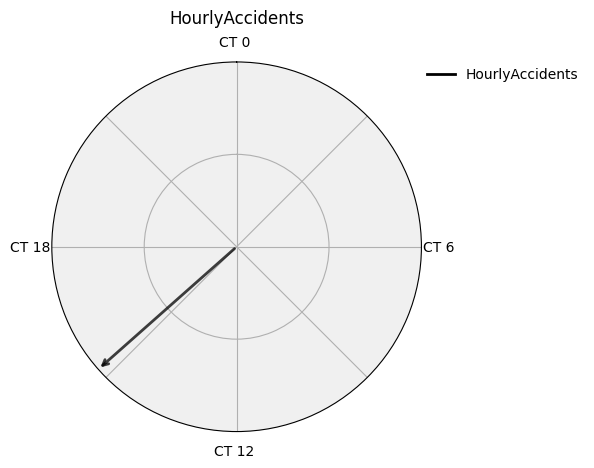

c:\Users\Hana\AppData\Local\Programs\Python\Python312\Lib\site-packages\CosinorPy\cosinor.py:1658: RuntimeWarning: invalid value encountered in scalar divide
  F = (SSLOF/(n_T-1-2*n_components))/(SSPE/(N-n_T))


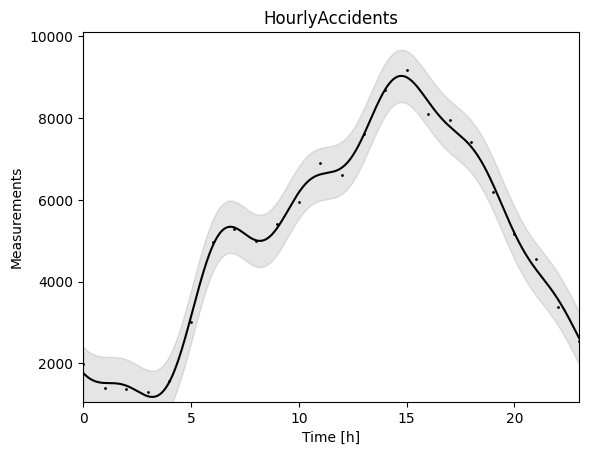

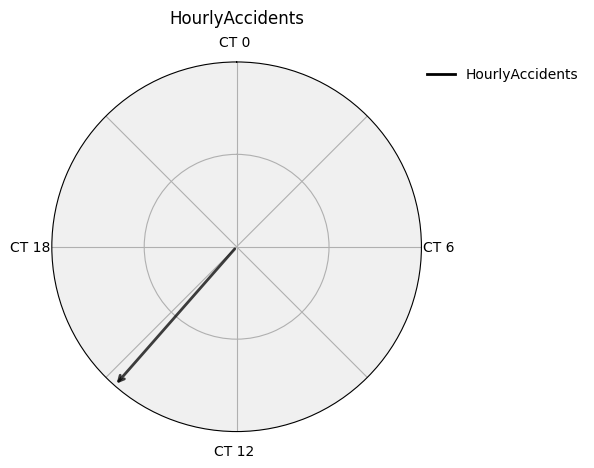

c:\Users\Hana\AppData\Local\Programs\Python\Python312\Lib\site-packages\CosinorPy\cosinor.py:1658: RuntimeWarning: invalid value encountered in scalar divide
  F = (SSLOF/(n_T-1-2*n_components))/(SSPE/(N-n_T))


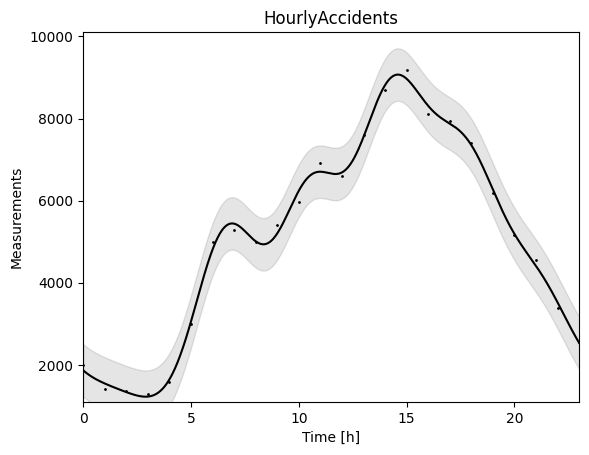

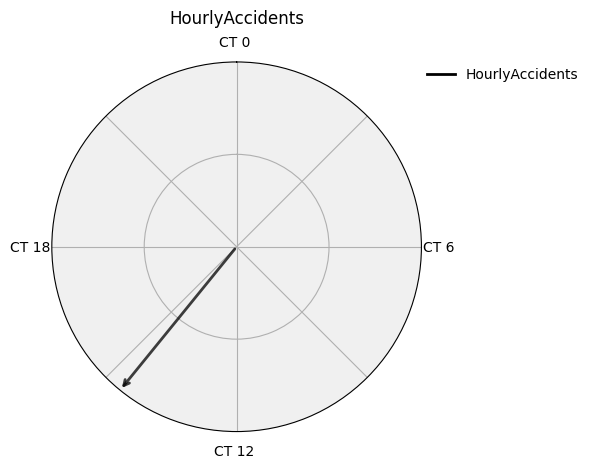

c:\Users\Hana\AppData\Local\Programs\Python\Python312\Lib\site-packages\CosinorPy\cosinor.py:1658: RuntimeWarning: invalid value encountered in scalar divide
  F = (SSLOF/(n_T-1-2*n_components))/(SSPE/(N-n_T))


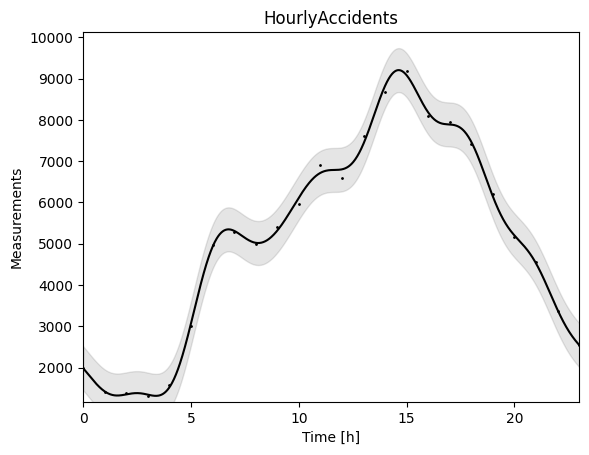

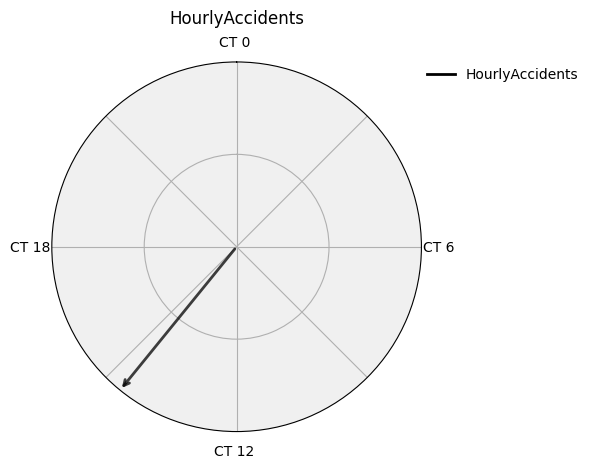

In [67]:
# Poskusim modele z različnim številom komponent
df_results = cosinor.fit_group(df_plot, n_components = [1,2,3,4,5,6,7,8], period = 24)
#print(df_results)

In [75]:
df_results

,test,period,n_components,p,q,p_reject,q_reject,RSS,R2,R2_adj,log-likelihood,amplitude,acrophase,mesor,peaks,heights,troughs,heights2,ME,resid_SE
0,HourlyAccidents,24.0,1.0,5.446754e-13,1.452468e-12,NaN,NaN,9.790218e+06,0.932077,0.925609,-189.080610,3345.984026,2.572395,5065.416889,[14.174174174174174],[8411.400914839534],[2.1621621621621623],[1719.4650634409875],1419.937533,682.789036
1,HourlyAccidents,24.0,2.0,1.836309e-13,7.345236e-13,NaN,NaN,5.154027e+06,0.964242,0.956714,-181.381347,3528.497771,2.207606,4866.543005,[15.567567567567567],[8395.035268883576],[1.2492492492492493],[1338.0564174039507],1090.111148,520.830683
2,HourlyAccidents,24.0,3.0,7.260859e-14,5.808687e-13,NaN,NaN,2.599494e+06,0.981965,0.975600,-173.167807,3879.352570,2.308237,4940.541582,[15.183183183183184],[8819.88834966803],[1.96996996996997],[1061.3246592284554],825.019933,391.038886
3,HourlyAccidents,24.0,4.0,5.192735e-12,1.038547e-11,NaN,NaN,2.344142e+06,0.983737,0.975063,-171.927037,3814.441614,2.358553,4884.198629,[14.99099099099099],[8698.640243398322],[2.21021021021021],[1069.8462869986663],842.599801,395.317732
4,HourlyAccidents,24.0,5.0,8.558720e-11,1.141163e-10,NaN,NaN,1.737507e+06,0.987946,0.978673,-168.333424,3936.029094,2.295658,4960.561613,[15.23123123123123],[8896.566178250258],[2.6906906906906904],[1024.6731044107823],789.804330,365.587757
5,HourlyAccidents,24.0,6.0,2.886136e-11,4.617817e-11,NaN,NaN,6.061551e+05,0.995795,0.991207,-155.696574,3927.593291,2.421448,5105.863655,"[6.822822822822823, 14.75075075075075]","[5341.849062739048, 9033.45694583928]","[3.219219219219219, 8.168168168168169]","[1178.3082497189812, 4996.56687526812]",516.669311,234.744568
6,HourlyAccidents,24.0,7.0,1.534631e-09,1.753864e-09,NaN,NaN,4.427525e+05,0.996928,0.992150,-151.927073,3922.531924,2.459185,5147.636892,"[6.918918918918919, 11.003003003003004, 14.606...","[5445.011336678218, 6704.72895010804, 9070.138...","[2.8828828828828827, 8.36036036036036]","[1225.1081832010148, 4936.818498181122]",501.743805,221.798827
7,HourlyAccidents,24.0,8.0,2.311985e-08,2.311985e-08,NaN,NaN,2.083361e+05,0.998555,0.995251,-142.880776,3947.000740,2.459185,5260.137742,"[6.726726726726727, 14.606606606606606]","[5348.014571114351, 9206.616363327534]","[1.5855855855855856, 3.3633633633633635, 8.120...","[1321.1676286339336, 1313.1370013495261, 5016....",407.939190,172.517553


In [74]:
df_best_model = cosinor.get_best_models(df_plot, df_results, n_components = [1,2,3,4,5,6,7,8])
df_best_model

,test,period,n_components,p,q,p_reject,q_reject,RSS,R2,R2_adj,log-likelihood,amplitude,acrophase,mesor,peaks,heights,troughs,heights2,ME,resid_SE
0,HourlyAccidents,24.0,6.0,2.886136e-11,4.617817e-11,NaN,NaN,606155.134151,0.995795,0.991207,-155.696574,3927.593291,2.421448,5105.863655,"[6.822822822822823, 14.75075075075075]","[5341.849062739048, 9033.45694583928]","[3.219219219219219, 8.168168168168169]","[1178.3082497189812, 4996.56687526812]",516.669311,234.744568


#### **Najboljši model je 6-komponentni kosinor**

c:\Users\Hana\AppData\Local\Programs\Python\Python312\Lib\site-packages\CosinorPy\cosinor.py:1658: RuntimeWarning: invalid value encountered in scalar divide
  F = (SSLOF/(n_T-1-2*n_components))/(SSPE/(N-n_T))


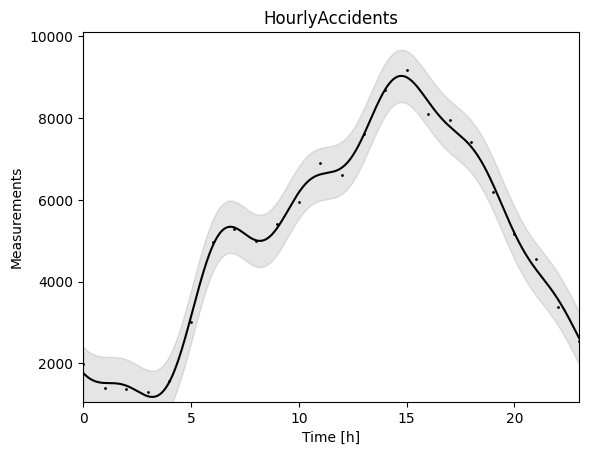

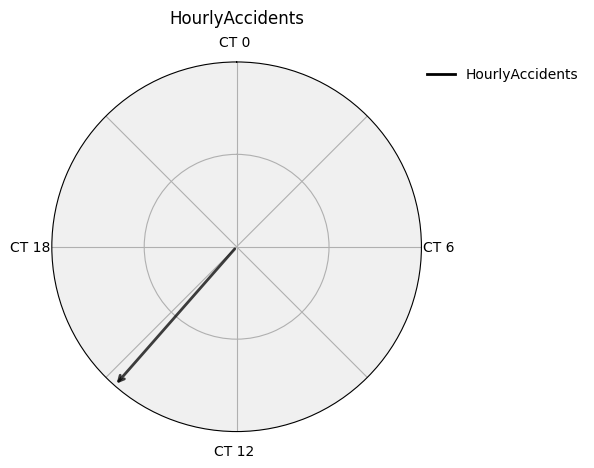

In [72]:
# Prikaži najboljši model
cosinor.plot_df_models(df_plot, df_best_model)